In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#  Assignment 1 - Source Distribution on an Airfoil

### Setting Up

In [2]:
#Load data from txt files
NACA_x = np.loadtxt("./resources/NACA0012_x.txt")
NACA_y = np.loadtxt("./resources/NACA0012_y.txt")
NACA_sigma = np.loadtxt("./resources/NACA0012_sigma.txt")

In [3]:
#generate mesh
N = 51
x_start,x_end,y_start,y_end = -1.0,2.0,-0.5,0.5
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [4]:
def velprofile(sigma,x_source,y_source,X,Y):
    
    u = sigma/(2*np.pi)*(X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
    v = sigma/(2*np.pi)*(Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)
    
    return u, v

In [5]:
#velocity profile from all combined sources
U_source = 0
V_source = 0

for i in range(100):
    u_source,v_source = velprofile(NACA_sigma[i],NACA_x[i],NACA_y[i],X,Y)
    
    U_source = U_source + u_source
    V_source = V_source + v_source

In [6]:
#freestream
u_inf = 1.0
u_freestream = u_inf
v_freestream = 0.0

#combined
u = u_freestream + U_source
v = v_freestream + V_source

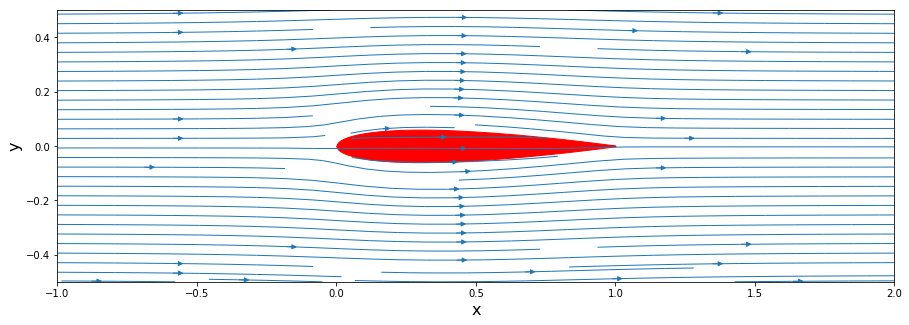

In [7]:
#plot
width = 15.0
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width,height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density=1,linewidth=1)
plt.fill_between(NACA_x, NACA_y, color='r')

### The Pressure Coefficient

In [19]:
Cp = 1 - (u**2 + v**2)/u_inf**2
i,j = np.unravel_index(np.argmax(Cp), np.shape(Cp))
print('The max value of the Coefficient of pressure is', np.max(Cp))
print('The index of the max coefficient of pressure is',i,j)

x_stag = x_start+(x_end-x_start)/N*j
y_stag = y_start+(y_end-y_start)/N*i
print('The location of the stagnation point is', x_stag,',',y_stag)

The max value of the Coefficient of pressure is 0.471443661332
The index of the max coefficient of pressure is 25 16
The location of the stagnation point is -0.0588235294118 , -0.00980392156863


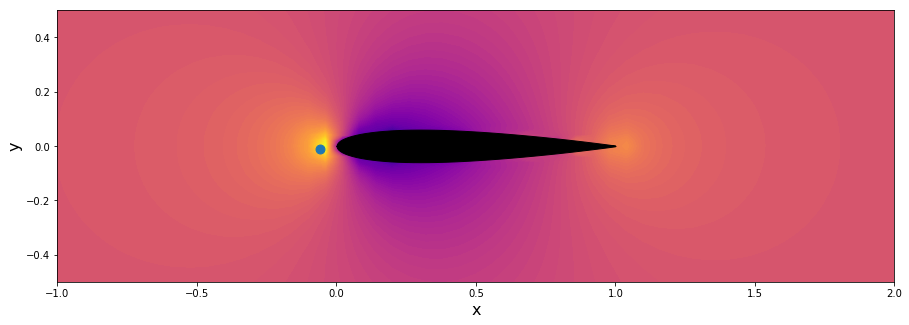

In [21]:
levels = np.linspace(np.min(Cp),np.max(Cp),100)

width = 15.0
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width,height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.contourf(X,Y,Cp,levels=levels,cmap='plasma')
plt.fill_between(NACA_x, NACA_y, color='k')
plt.scatter(x_stag,y_stag,s = 80) # point of highest pressure

The streamplot and the pressure distribution look as expected. These results look similar to what is typically seen in academic sources for this type of airfoil. Based on the pressure distribution, it appears that the airfoil is not generating lift since the pressure on the top and the bottom of the airfoil are the same. It would appear however that there is drag present based on there being the highest pressure at the leading edge of the airfoil. This makes sense because this is an expected stagnation point.